In [105]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 50})
import pandas as pd

In [106]:
#df = pd.read_csv("accl1.csv")
#df = pd.read_excel("C:\\Masters\\Project\\Recordings\\vishnu-walk.xlsx")
df = pd.read_excel("C:\\Masters\\Project\\Recordings\\Calculated\\EXCEL CALC\\Vishnu\\Right_Left_Leg_V.xlsx")

In [107]:
#df = df[0:5000].copy()
df.shape

(935, 17)

In [108]:
s=df.to_numpy()
t,ax_L,ay_L,az_L,amag_L,vx_L,vy_L,vz_L,vmag_L,ax_R,ay_R,az_R,amag_R,vx_R,vy_R,vz_R,vmag_R=s.T
print(t[10],amag_L[189],amag_R[10])

0.09 46.97677903720902 9.929382912185128


# Acceleration

Text(0.5, 1.0, 'Right')

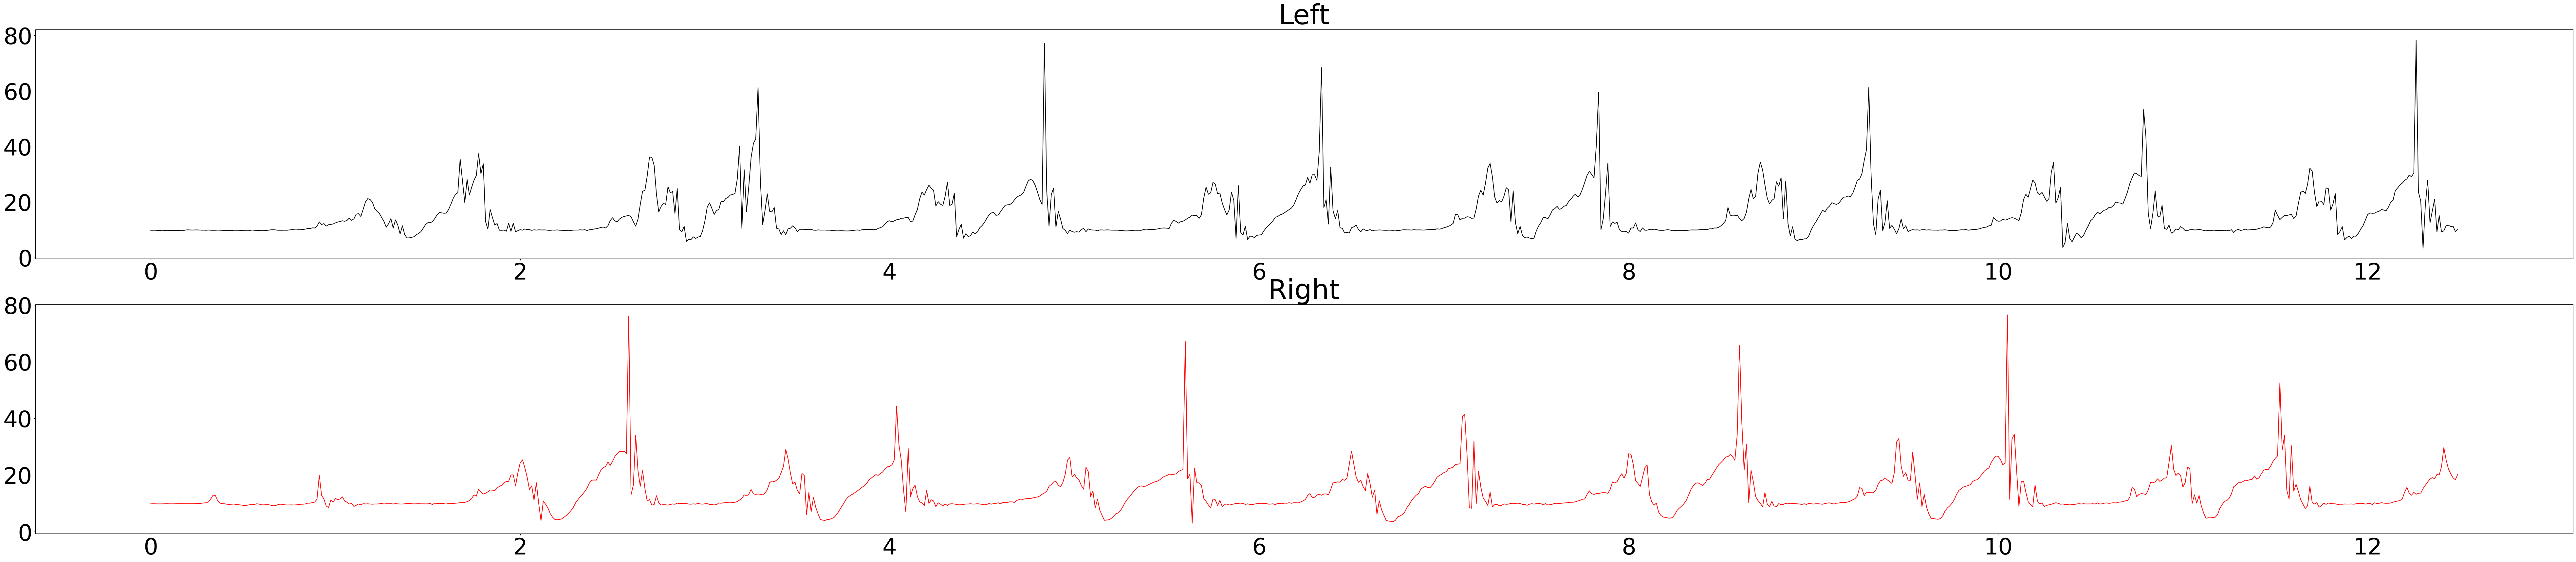

In [153]:
figure, axis = plt.subplots(2,1,figsize=(100, 20))
#plt.plot(t,ax,label="ax")
#plt.plot(t,ay,label="ay")
#plt.plot(t,az,label="az")
axis[0].plot(t,amag_L,label='amag_L',color='black')  #acceleration of left leg
axis[1].plot(t,amag_R,label='amag_R',color='red')    #acceleration of Right leg
#figure.supxlabel('time[s]')
#figure.supxlabel('acc[m/s^2]')

axis[0].set_title('Left')
axis[1].set_title('Right')


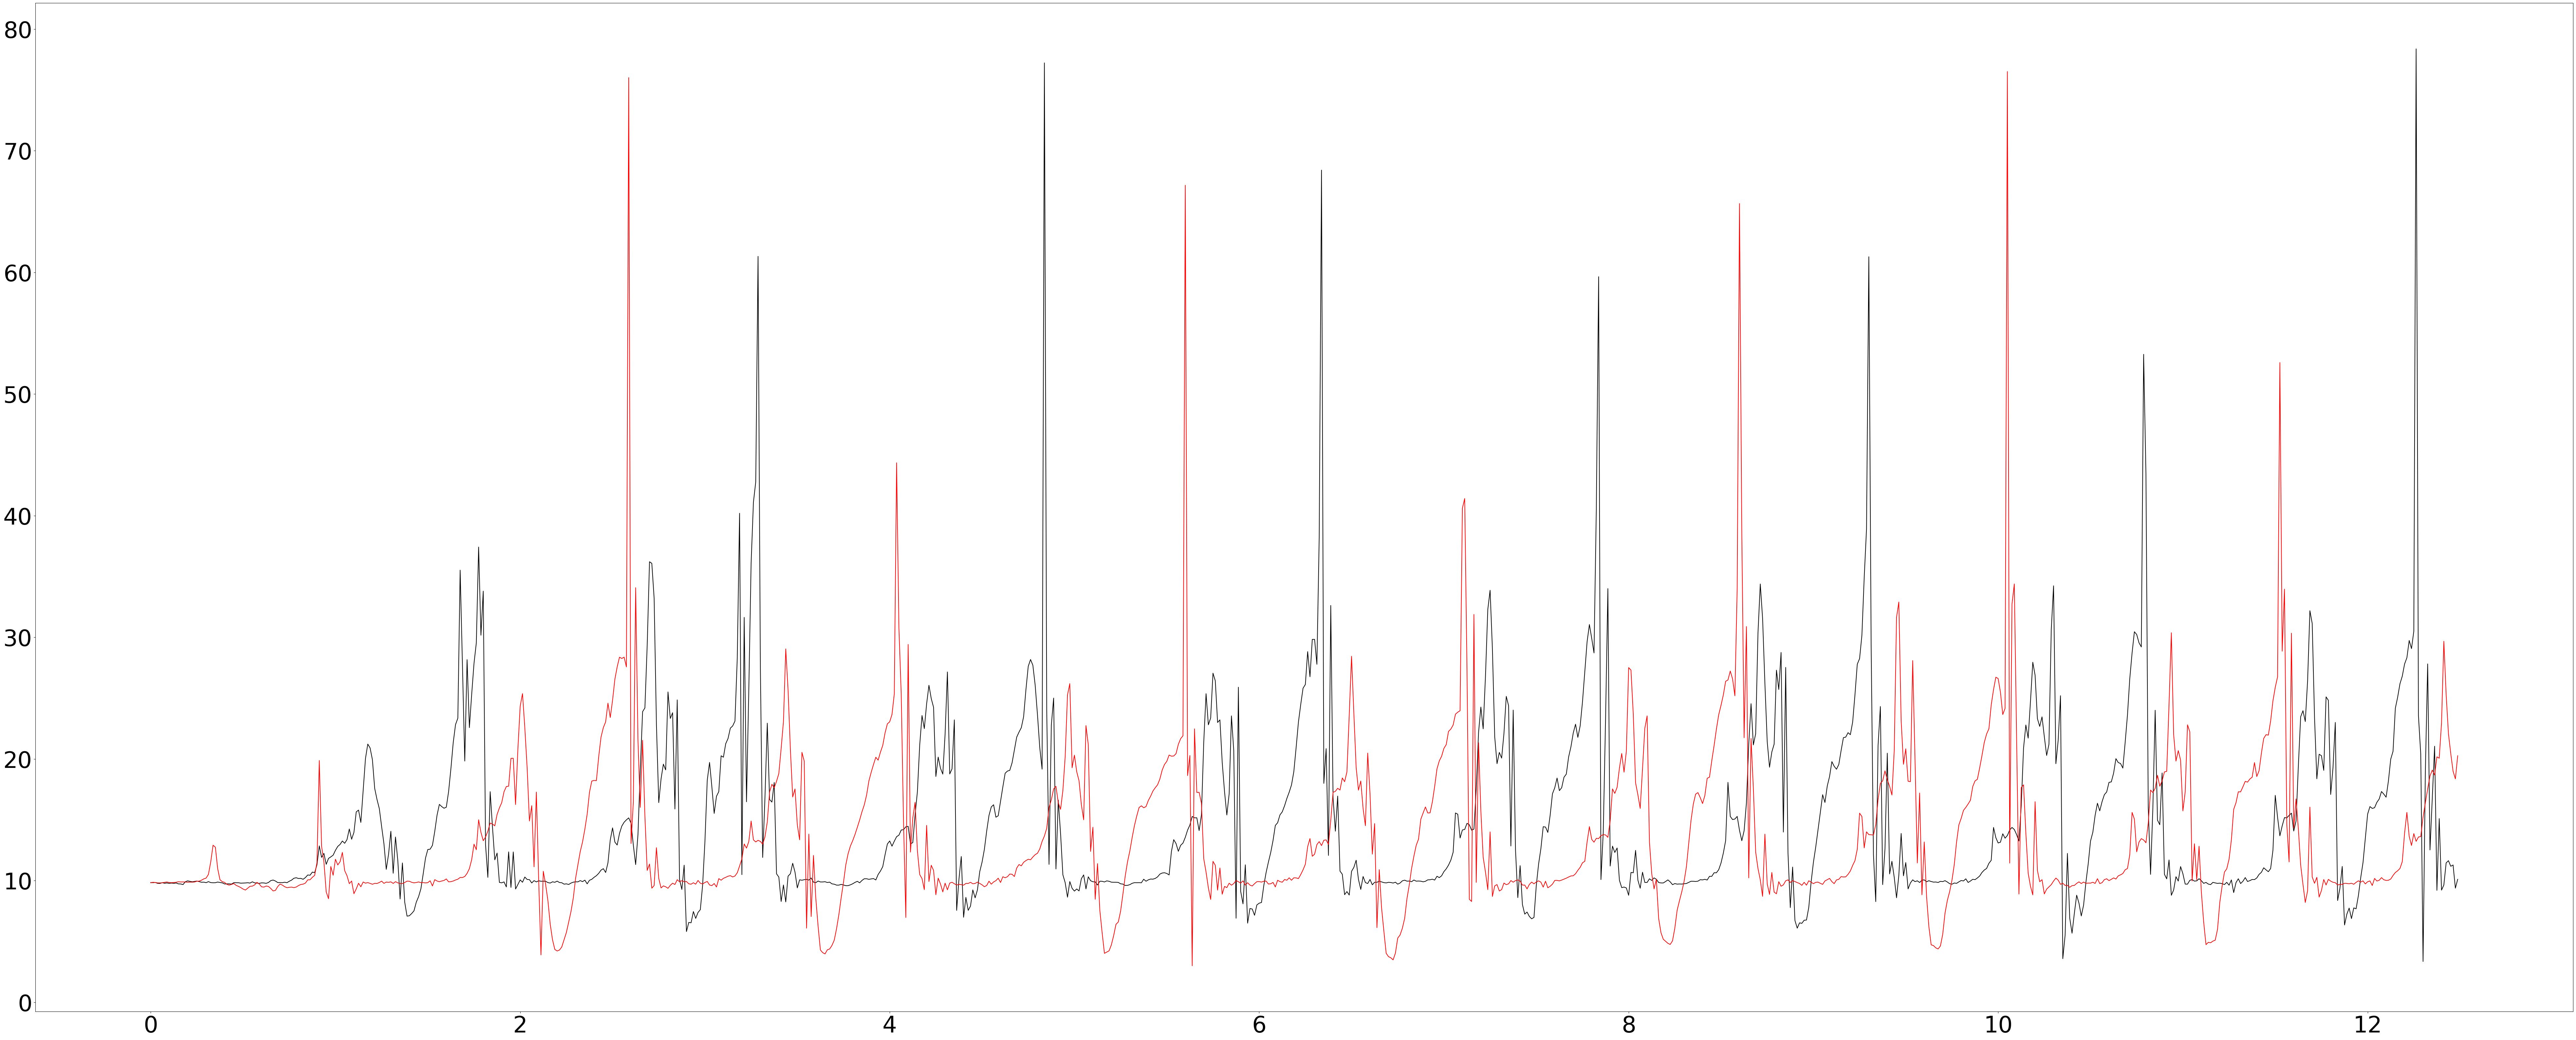

In [154]:
plt.figure(figsize=(100,40))#.set_figwidth(100)
plt.plot(t,amag_L,label='amag_L',color='black')
plt.plot(t,amag_R,label='amag_R',color='Red')

In [155]:
df.columns

Index(['Time', 'Acc_XL', 'Acc_YL', 'Acc_ZL', 'Abs_left', 'VelInc_XL',
       'VelInc_YL', 'VelInc_ZL', 'Velmag_L', 'Acc_XR', 'Acc_YR', 'Acc_ZR',
       'Abs_Right', 'VelInc_XR', 'VelInc_YR', 'VelInc_ZR', 'Velmag_R'],
      dtype='object')

In [156]:
amagstd_L=df['Abs_left'].std()
amagmean_L=df['Abs_left'].mean()
amagstd_R=df['Abs_Right'].std()
amagmean_R=df['Abs_Right'].mean()
print("STD-Left=",amagstd_L)
print("STD-Right=",amagstd_R)
print("Mean-Left=",amagmean_L)
print("Mean-Right=",amagmean_R)

STD-Left= 7.991359250513859
STD-Right= 7.026535400404117
Mean-Left= 14.979513482574
Mean-Right= 13.671983052352


In [157]:
range(0,len(df['Abs_left']))

range(0, 1000)

In [158]:
Left_peaks_acc=[]
y_L=[]
for i in range(1,len(df['Abs_left'])):
    if(df['Abs_left'][i]>=(amagmean_L+3*amagstd_L)):
        if(df['Abs_left'][i]>df['Abs_left'][i+1]) and (df['Abs_left'][i]>df['Abs_left'][i-1]):
            if len(Left_peaks_acc)==0:
                Left_peaks_acc.append(df['Time'][i])
                y_L.append(i)
            else:
                if(df['Time'][i]-Left_peaks_acc[len(Left_peaks_acc)-1]>0.8):
                    Left_peaks_acc.append(df['Time'][i])
                    y_L.append(i)
    

y_R=[]            
Right_peaks_acc=[]
for i in range(0,len(df['Abs_Right'])):
    if(df['Abs_Right'][i]>=(amagmean_R+3*amagstd_R)):
        if(df['Abs_Right'][i]>df['Abs_Right'][i+1]) and (df['Abs_Right'][i]>df['Abs_Right'][i-1]):
            if len(Right_peaks_acc)==0:
                Right_peaks_acc.append(df['Time'][i])
                y_R.append(i)
            else:
                if(df['Time'][i]-Right_peaks_acc[len(Right_peaks_acc)-1]>0.8):
                    Right_peaks_acc.append(df['Time'][i])
                    y_R.append(i)
            
            


Text(0.5, 1.0, 'Acc vs Time')

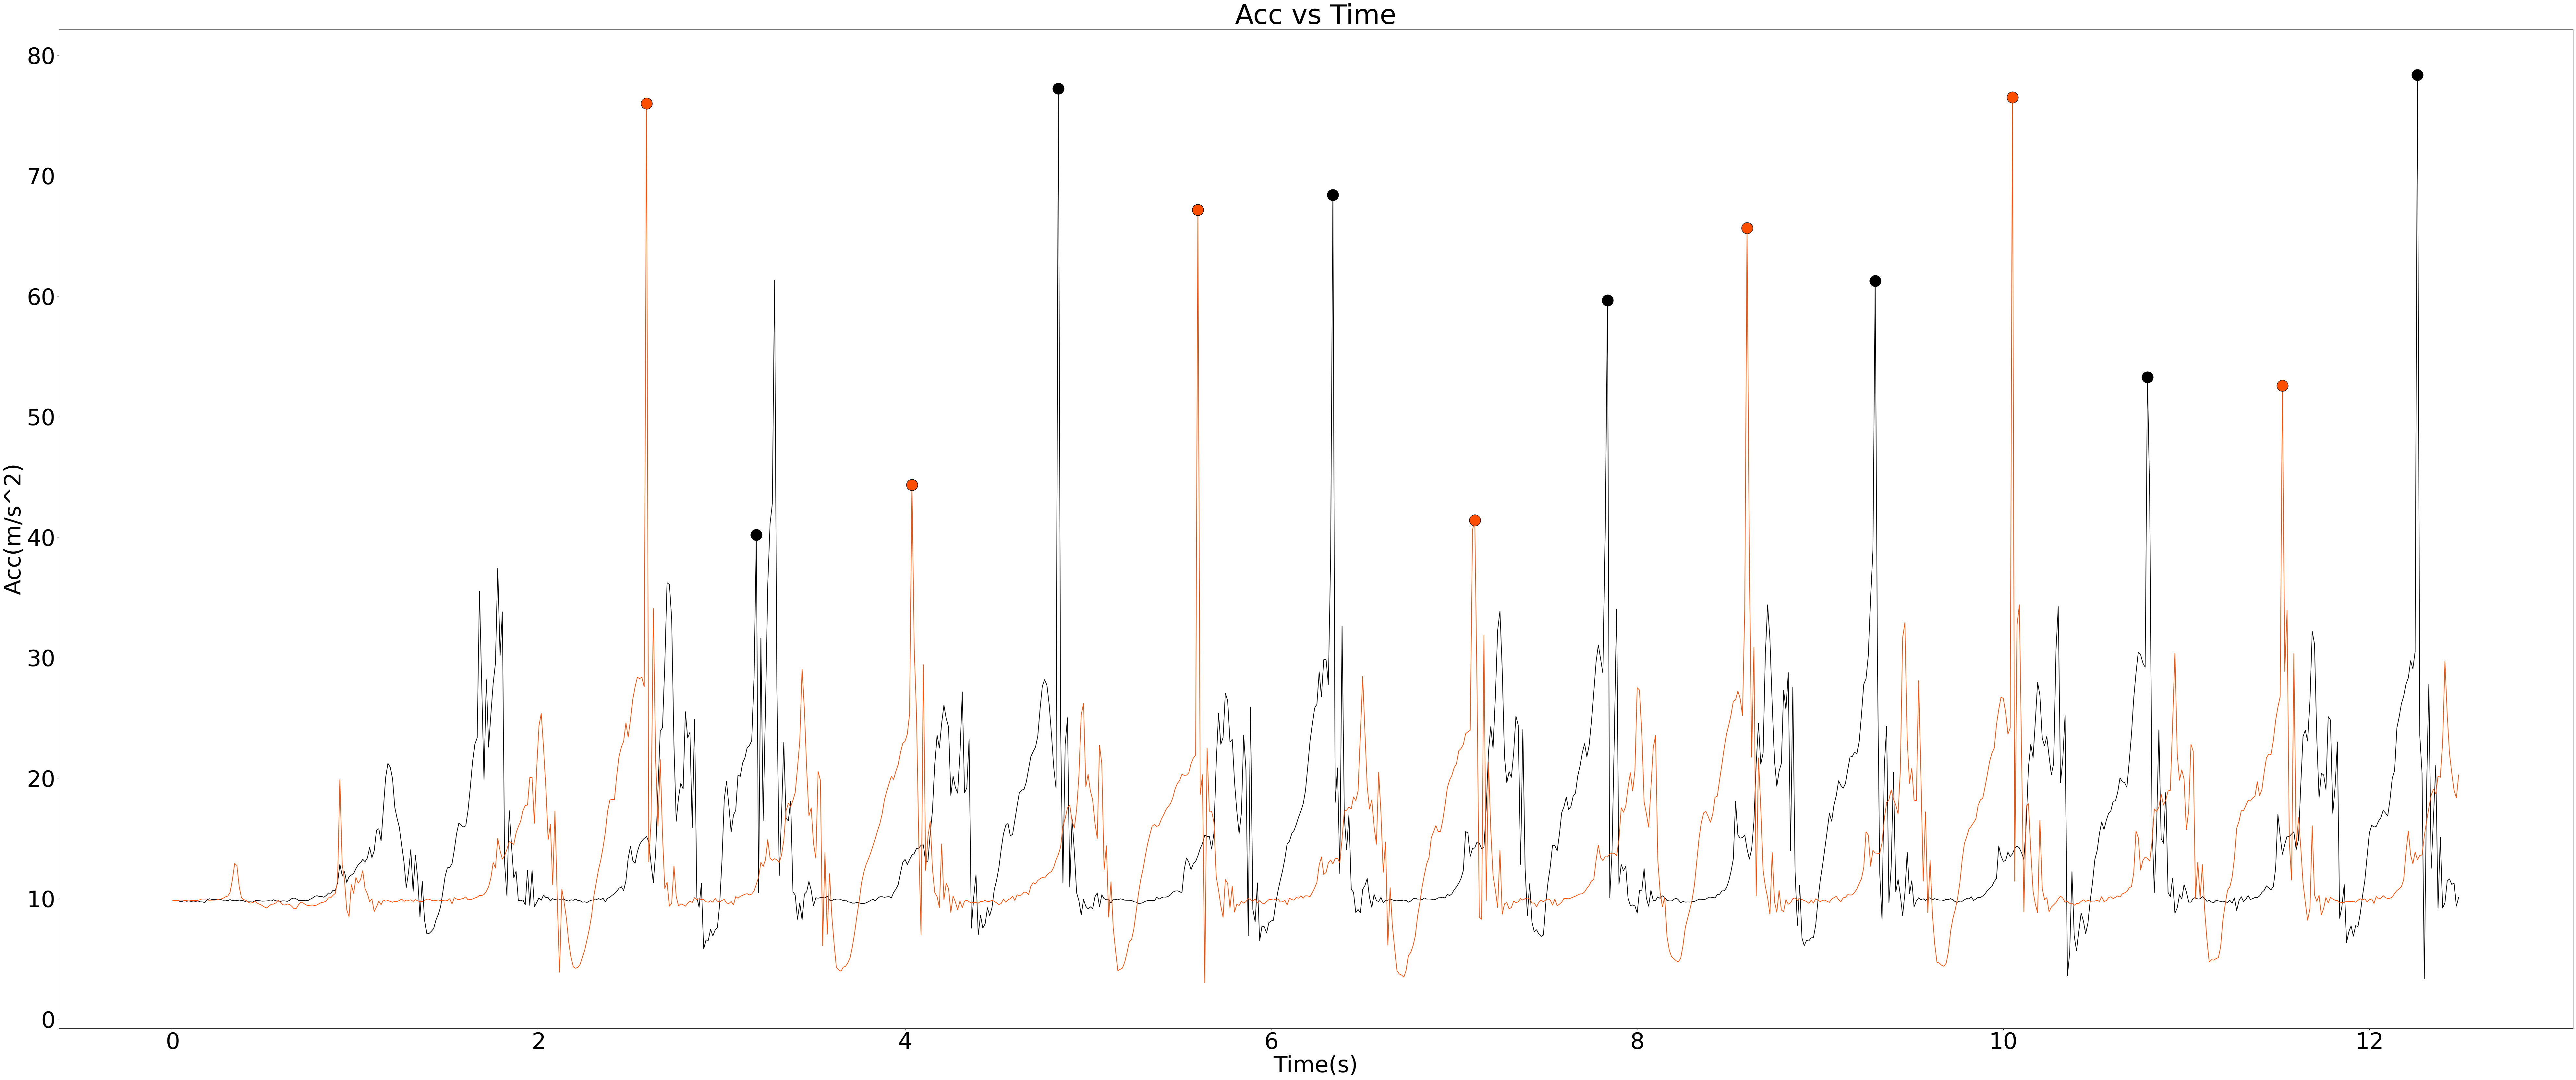

In [159]:
plt.figure(figsize=(100,40))#.set_figwidth(100)
plt.plot(t,amag_L,label='amag_L',color='black')
plt.plot(t,amag_R,label='amag_R',color='#fc4e03')
plt.plot(Left_peaks_acc,[amag_L[i] for i in y_L], ls="", marker="o",markerfacecolor='black',markersize=25,markeredgecolor='black', label="points")
plt.plot(Right_peaks_acc,[amag_R[i] for i in y_R], ls="", marker="o",markerfacecolor='#fc4e03',markersize=25,markeredgecolor='black', label="points")
plt.xlabel("Time(s)")
plt.ylabel("Acc(m/s^2)")
plt.title("Acc vs Time")

In [160]:
print(Left_peaks_acc)
print(Right_peaks_acc)
print(y_R)

[3.1875, 4.8375, 6.3375, 7.8375, 9.3, 10.7875, 12.2625]
[2.5875, 4.0375, 5.6, 7.1125, 8.6, 10.05, 11.525]
[207, 323, 448, 569, 688, 804, 922]


In [161]:
z=[amag_L[i] for i in y_L]
print(y_L)
print(z)

[255, 387, 507, 627, 744, 863, 981]
[40.19430006, 77.21769848, 68.40282837, 59.63991409, 61.28101838, 53.26126787, 78.3686889]


In [162]:
len(Left_peaks_acc)

7

# Velocity

Text(0.5, 1.0, 'Right')

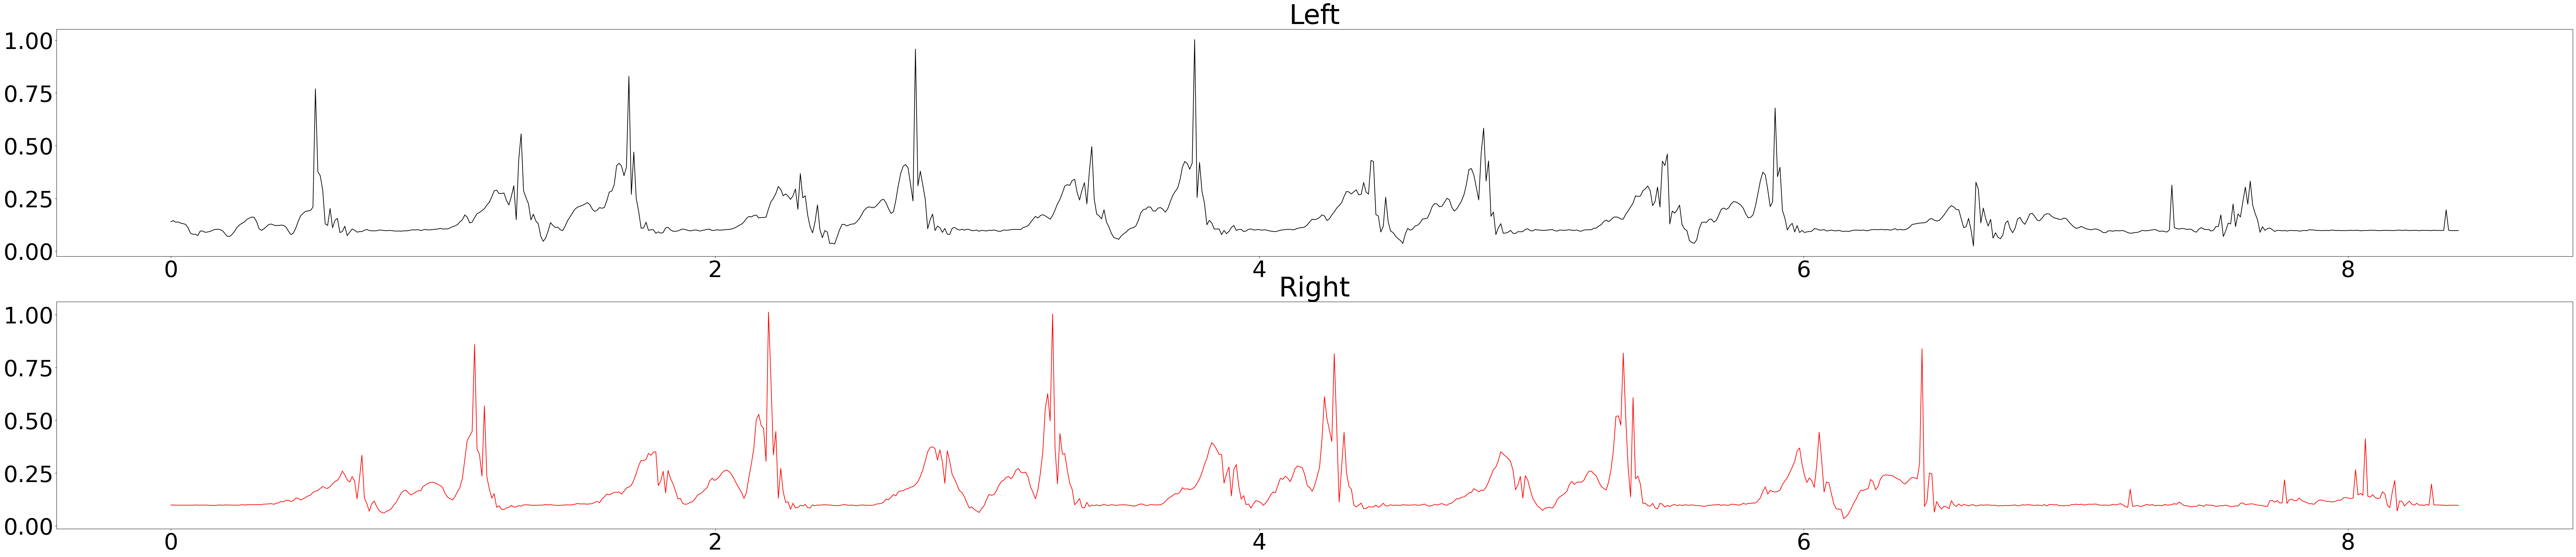

In [109]:
#Velocity
figure, axis = plt.subplots(2,1,figsize=(100, 20))
axis[0].plot(t,vmag_L,label='velocity_L',color='black')
axis[1].plot(t,vmag_R,label='velocity_R',color='red')
axis[0].set_title('Left')
axis[1].set_title('Right')

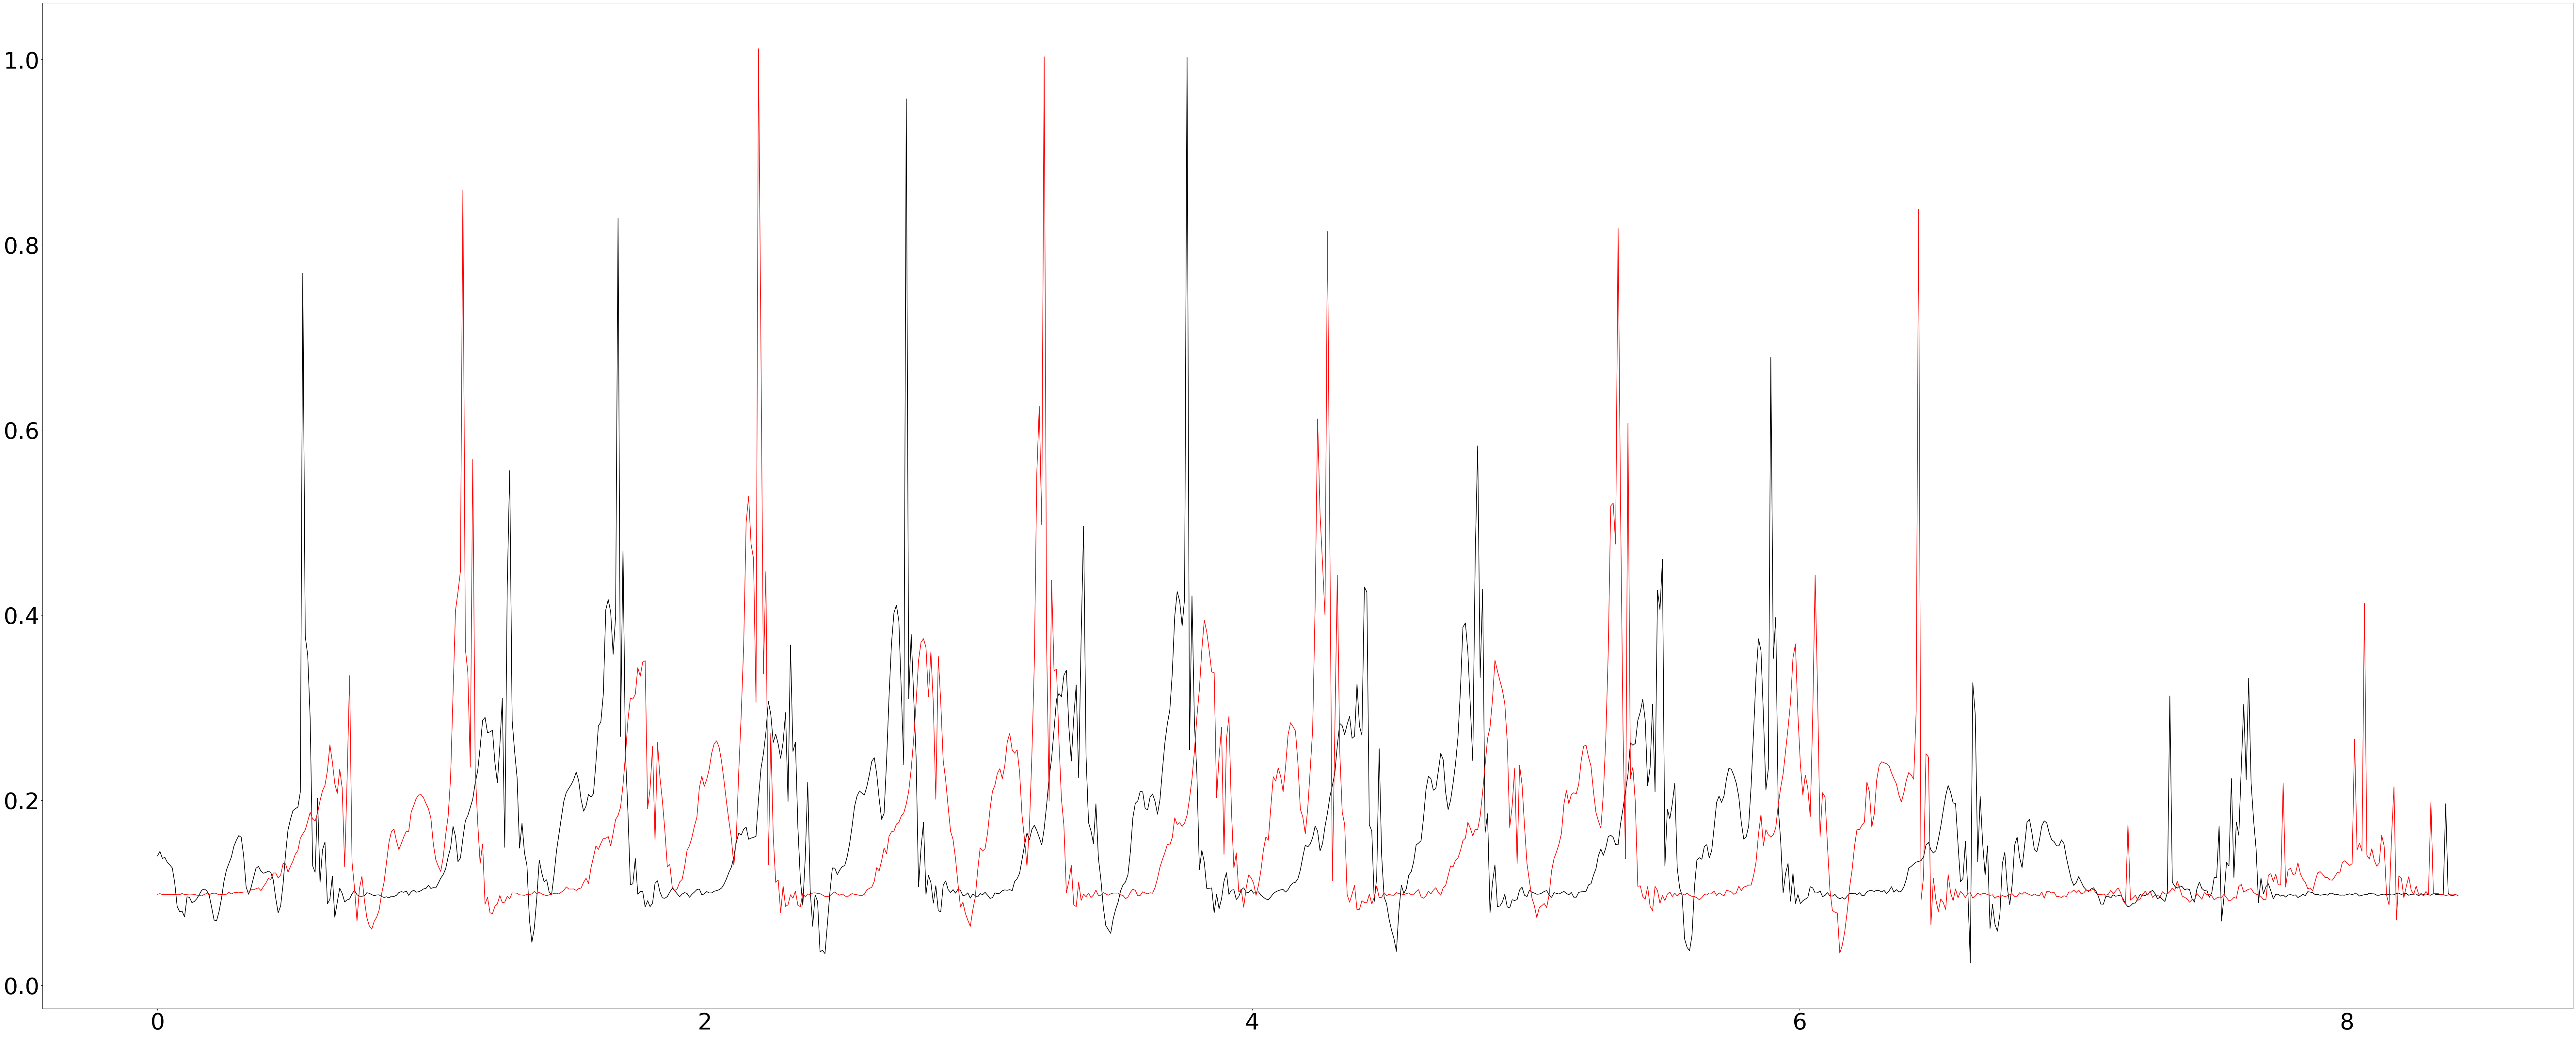

In [110]:
plt.figure(figsize=(100,40))#.set_figwidth(100)
plt.plot(t,vmag_L,label='vel_L',color='black')
plt.plot(t,vmag_R,label='vel_R',color='Red')

In [111]:
vmagstd_L=df['Velmag_L'].std()
vmagmean_L=df['Velmag_L'].mean()
vmagstd_R=df['Velmag_R'].std()
vmagmean_R=df['Velmag_R'].mean()
print("STD-Left=",vmagstd_L)
print("STD-Right=",vmagstd_R)
print("Mean-Left=",vmagmean_L)
print("Mean-Right=",vmagmean_R)

STD-Left= 0.09714147946506006
STD-Right= 0.10863922464001077
Mean-Left= 0.15633243001839914
Mean-Right= 0.16179645042871652


In [112]:
Left_peaks_vel=[]
y_L=[]
for i in range(1,len(df['Velmag_L'])):
    if(df['Velmag_L'][i]>=(vmagmean_L+3*vmagstd_L)):
        if(df['Velmag_L'][i]>df['Velmag_L'][i+1]) and (df['Velmag_L'][i]>df['Velmag_L'][i-1]):
            if len(Left_peaks_vel)==0:
                Left_peaks_vel.append(df['Time'][i])
                y_L.append(i)
            else:
                if(df['Time'][i]-Left_peaks_vel[len(Left_peaks_vel)-1]>0.8):
                    Left_peaks_vel.append(df['Time'][i])
                    y_L.append(i)
    

y_R=[]            
Right_peaks_vel=[]
for i in range(1,len(df['Velmag_R'])):
    if(df['Velmag_R'][i]>=(vmagmean_R+3*vmagstd_R)):
        if(df['Velmag_R'][i]>df['Velmag_R'][i+1]) and (df['Velmag_R'][i]>df['Velmag_R'][i-1]):
            if len(Right_peaks_vel)==0:
                Right_peaks_vel.append(df['Time'][i])
                y_R.append(i)
            else:
                if(df['Time'][i]-Right_peaks_vel[len(Right_peaks_vel)-1]>0.8):
                    Right_peaks_vel.append(df['Time'][i])
                    y_R.append(i)

Text(0.5, 1.0, 'Vel vs Time')

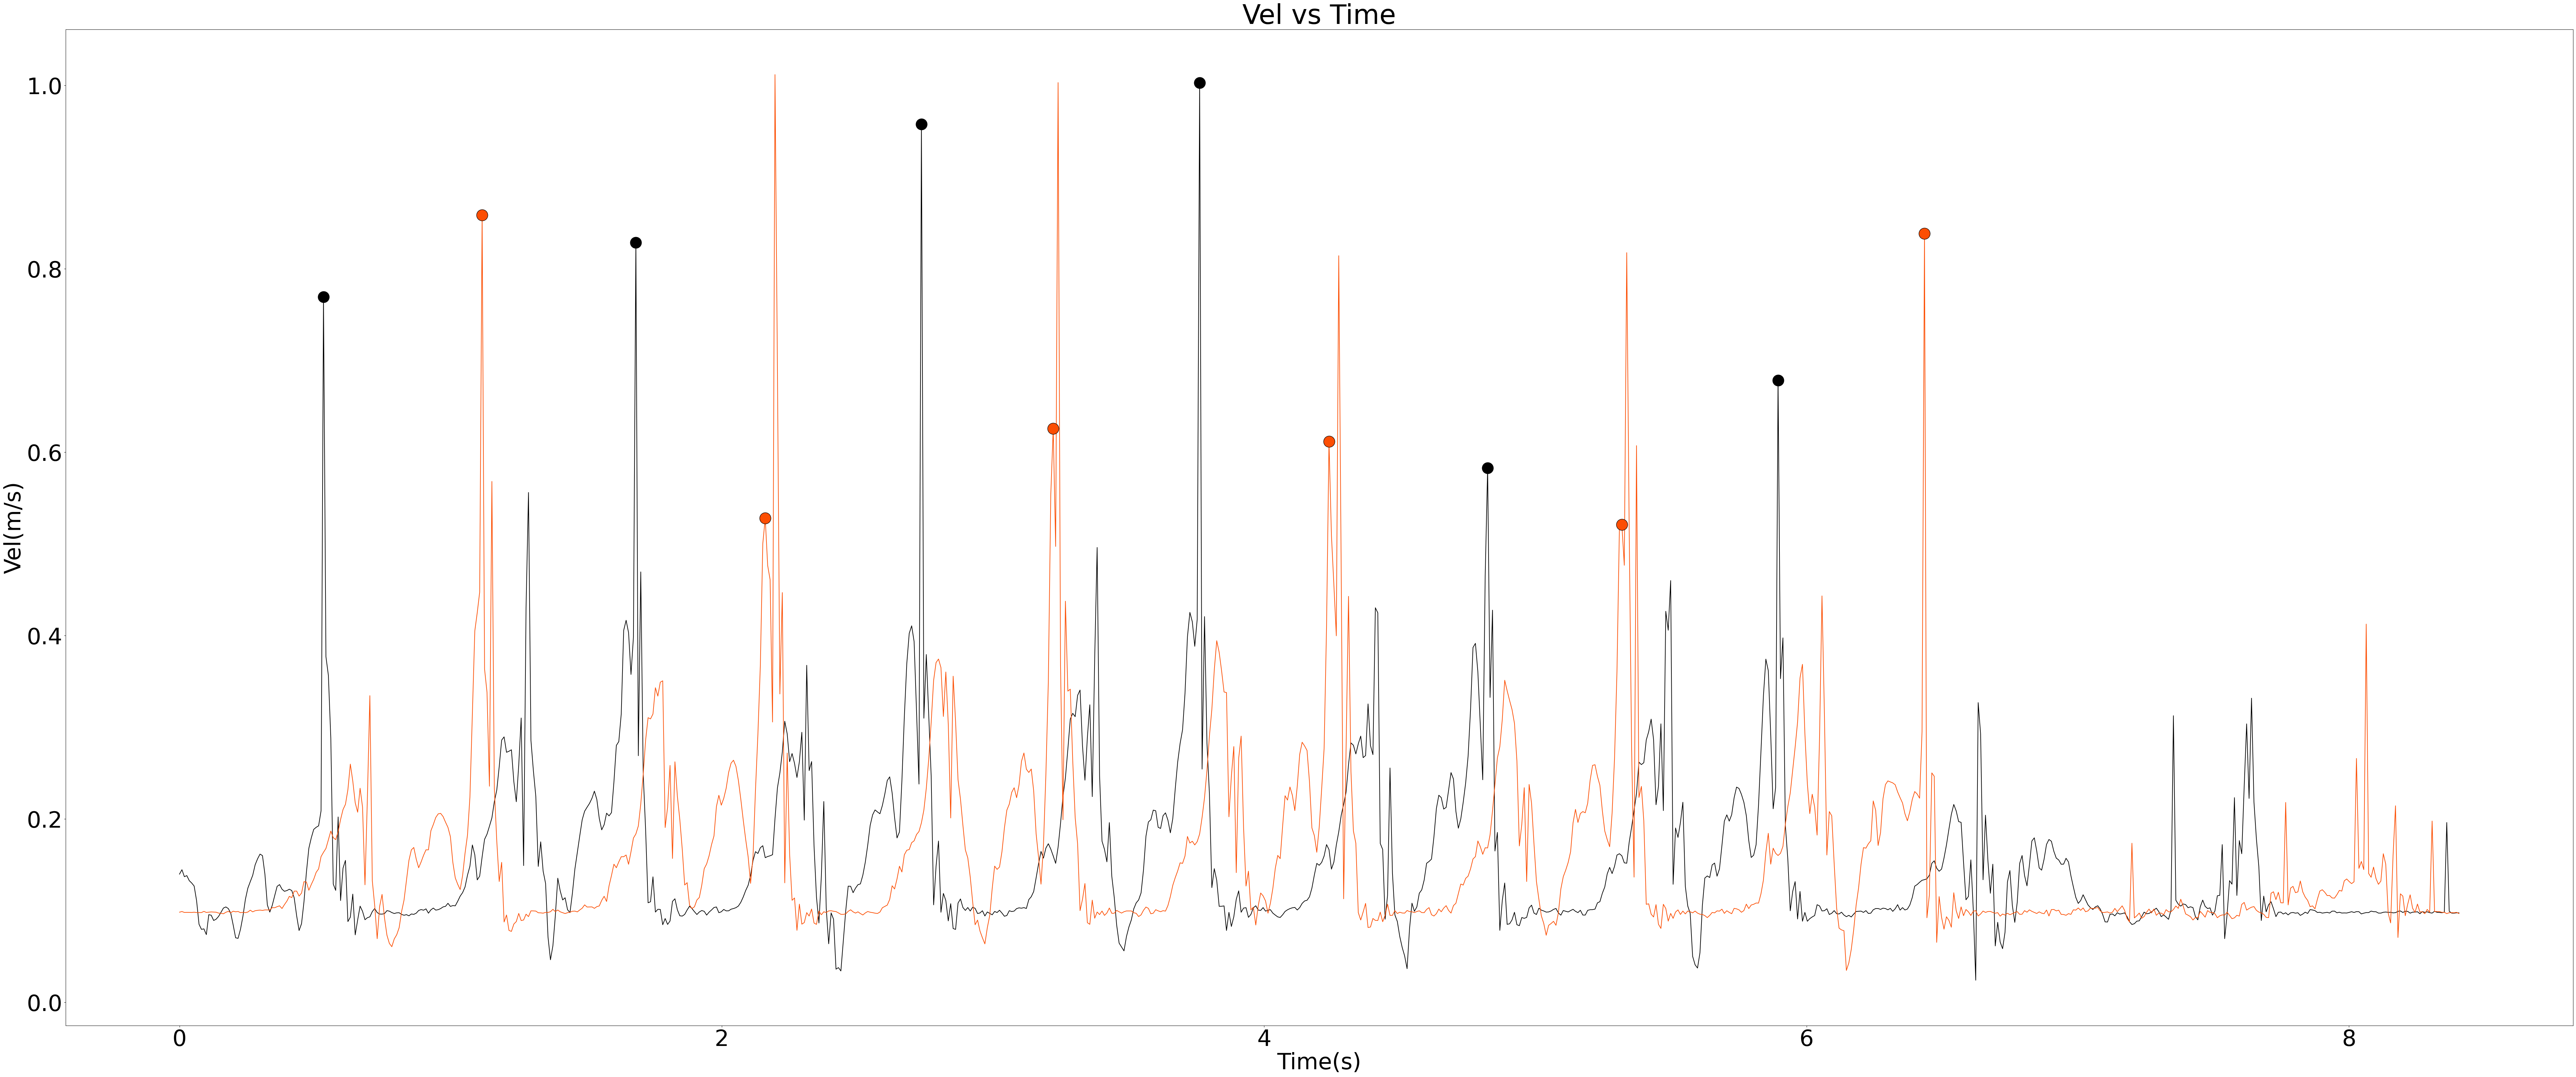

In [113]:
plt.figure(figsize=(100,40))#.set_figwidth(100)
plt.plot(t,vmag_L,label='vmag_L',color='black')
plt.plot(t,vmag_R,label='vmag_R',color='#fc4e03')
plt.plot(Left_peaks_vel,[vmag_L[i] for i in y_L], ls="", marker="o",markerfacecolor='black',markersize=25,markeredgecolor='black', label="points")
plt.plot(Right_peaks_vel,[vmag_R[i] for i in y_R], ls="", marker="o",markerfacecolor='#fc4e03',markersize=25,markeredgecolor='black', label="points")
plt.xlabel("Time(s)")
plt.ylabel("Vel(m/s)")
plt.title("Vel vs Time")

In [114]:
#comparing
R_vel = [round(vmag_R[i],2) for i in y_R]
L_vel = [round(vmag_L[i],2) for i in y_L]
Right_peaks_vel = [round(i,2) for i in Right_peaks_vel]
Left_peaks_vel = [round(i,2) for i in Left_peaks_vel]
print("Right peaks for vel:", Right_peaks_vel)
print("Left peaks for vel:", Left_peaks_vel)
print("Right leg Vel at peaks:", R_vel)
print("Left leg Vel at peaks:", L_vel)

Right peaks for vel: [1.12, 2.16, 3.22, 4.24, 5.32, 6.44]
Left peaks for vel: [0.53, 1.68, 2.74, 3.76, 4.82, 5.9]
Right leg Vel at peaks: [0.86, 0.53, 0.63, 0.61, 0.52, 0.84]
Left leg Vel at peaks: [0.77, 0.83, 0.96, 1.0, 0.58, 0.68]


In [115]:
#merging Right_peaks_vel Left_peaks_vel
common_length = min(len(Left_peaks_vel),len(Right_peaks_vel))
time_interval = 0.09

merged_vel = []
first_step = ""
for i in range(common_length):
    if(Right_peaks_vel[i]>Left_peaks_vel[i]):
        first_step = "L"
    else:
        first_step = "R"
    merged_vel.append(min(Right_peaks_vel[i],Left_peaks_vel[i]))
    merged_vel.append(max(Right_peaks_vel[i],Left_peaks_vel[i]))
    
if len(Right_peaks_vel) > common_length:
    [merged_vel.append(Right_peaks_vel[x]) for x in range(common_length,len(Right_peaks_vel))]
    
if len(Left_peaks_vel) > common_length:
    [merged_vel.append(Left_peaks_vel[x]) for x in range(common_length,len(Left_peaks_vel))]
    
print(merged_vel)
#print(first_step)

# #Calculating average time for a step = 0.8
# x=[]
# for i in range(0,60):
#     x.append(merged_vel[i+1]-merged_vel[i])
# print(mean(x))

[0.53, 1.12, 1.68, 2.16, 2.74, 3.22, 3.76, 4.24, 4.82, 5.32, 5.9, 6.44]


In [62]:
x=df[(df['Time']>=0.48) & (df['Time']<=6.75)][['Velmag_L','Velmag_R']]

In [63]:
x['values']=x['Velmag_L']*0.009
round((x['values'].sum()*1000),2)

616.44

In [116]:
#Calculating the average step length
from statistics import mean
Step_lengths=[]
for i in range(0,len(merged_vel)-1):
    diff= merged_vel[i+1] - merged_vel[i]
    if diff<0.9:
        #print(i,merged_vel[i],i+1,merged_vel[i+1])
        x=df[(df['Time']>=merged_vel[i]) & (df['Time']<=merged_vel[i+1])][['Velmag_L','Velmag_R']]
        if first_step == 'R':
            x['values']=x['Velmag_R']*0.009
            Step_lengths.append(round((x['values'].sum()*1000),2))
            first_step = 'L'
        elif first_step == 'L':
            x['values']=x['Velmag_L']*0.009
            Step_lengths.append(round((x['values'].sum()*1000),2))
            first_step = 'R' 
        
print(mean(Step_lengths))

75.89727272727272


In [62]:
#generating numbers for time
t=[]
x=0
for i in range(0,20):
    t.append(round(x,4))
    x=x+0.009
print(t)

[0, 0.009, 0.018, 0.027, 0.036, 0.045, 0.054, 0.063, 0.072, 0.081, 0.09, 0.099, 0.108, 0.117, 0.126, 0.135, 0.144, 0.153, 0.162, 0.171]


In [211]:
#sorting steps time
merged_vel=Right_peaks_vel+Left_peaks_vel
merged_vel.sort()

In [119]:
sum(Step_lengths)

834.8700000000001

In [120]:
Step_lengths

[77.53, 73.04, 66.83, 98.39, 60.68, 89.99, 68.86, 88.93, 64.19, 84.45, 61.98]